In [ ]:
-from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np

In [ ]:
# Path to the dataset directory in Google Drive
dataset_dir = '/content/drive/My Drive/braintumordataset'
# List files in the dataset directory
file_list = os.listdir(dataset_dir)

print(file_list[:5])


['Testing', 'Training']


In [ ]:
# Path to the directories containing training and testing data
train_datasets = "/content/drive/MyDrive/braintumordataset/Training"
validation_datasets = "/content/drive/MyDrive/braintumordataset/Testing"

In [ ]:
batch_size = 16
image_size = 224
epochs= 30

In [ ]:
def prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size):

    train_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  fill_mode = "nearest")


    validation_datasets_generator = ImageDataGenerator(rescale=1.0/255)


    train_datasets_generator_data = train_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = train_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

    validation_datasets_generator_data = validation_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = validation_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )


    return train_datasets_generator_data, validation_datasets_generator_data

In [ ]:
train_data , validation_data = prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense
from tensorflow.keras.layers import BatchNormalization


# Loading pre-trained VGG19 model without the top (fully connected) layers
base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3), pooling=None)

# Freezing the layers of the pre-trained VGG19 model
for layer in base_model.layers:
    layer.trainable = False

# Building custom model on top of the pre-trained VGG19
model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_max_pooling2d (Glob  (None, 512)               0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 20289092 (77.40 MB)
Trainable params: 26470

In [ ]:
model_checkpoint_filpath4 = "model_checkpoint.h5"
callbacks_checkpoints4 = ModelCheckpoint(

    filepath = model_checkpoint_filpath4,
    save_weights_only = True,
    monitor = "val_accuracy",
    mode = "max",
    save_best_only = True
)

In [ ]:
history = model.fit(train_data,
                    steps_per_epoch = len(train_data),
                    epochs = epochs,
                    validation_data = validation_data,
                    validation_steps = len(validation_data),
                    callbacks = [callbacks_checkpoints4]
                    )

Epoch 1/30
180/180 [==============================] - 766s 4s/step - loss: 1.2380 - accuracy: 0.4617 - val_loss: 1.3932 - val_accuracy: 0.4162
Epoch 2/30
180/180 [==============================] - 52s 290ms/step - loss: 0.9033 - accuracy: 0.6073 - val_loss: 1.3270 - val_accuracy: 0.4695
Epoch 3/30
180/180 [==============================] - 52s 286ms/step - loss: 0.8084 - accuracy: 0.6537 - val_loss: 1.2185 - val_accuracy: 0.5457
Epoch 4/30
180/180 [==============================] - 51s 283ms/step - loss: 0.7721 - accuracy: 0.6798 - val_loss: 1.3492 - val_accuracy: 0.5228
Epoch 5/30
180/180 [==============================] - 51s 285ms/step - loss: 0.7170 - accuracy: 0.7087 - val_loss: 1.3984 - val_accuracy: 0.5508
Epoch 6/30
180/180 [==============================] - 53s 293ms/step - loss: 0.7116 - accuracy: 0.7195 - val_loss: 1.2484 - val_accuracy: 0.5381
Epoch 7/30
180/180 [==============================] - 51s 283ms/step - loss: 0.6643 - accuracy: 0.7293 - val_loss: 1.4901 - val_accu

In [ ]:
loss, accuracy = model.evaluate(validation_data, batch_size=batch_size)


25/25 [==============================] - 2s 89ms/step - loss: 1.3300 - accuracy: 0.6244


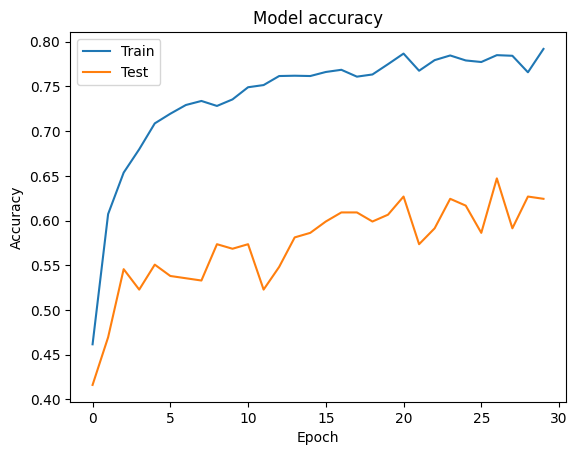

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

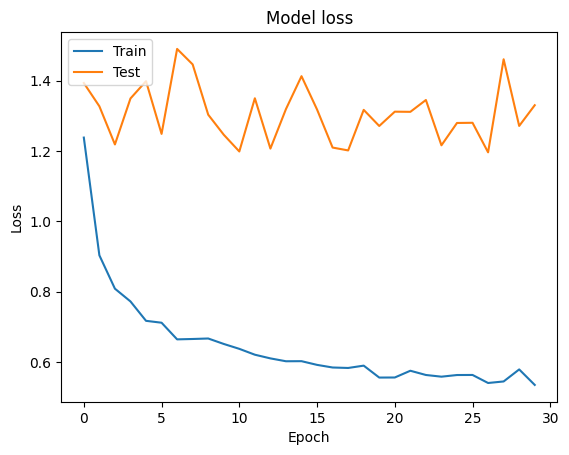

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()